In [1]:
# Enable plotting
%matplotlib inline

# Supress Warning 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import time

# Histogram Visualization by  Area of Interest (AOI) with map underlays



In [2]:
import datacube
dc = datacube.Datacube(app = 'my_app', config = '../datacube.conf')

Failed to resolve driver datacube.plugins.index::s3aio_index


# select  a scene to determine the bounding box from a small date range

## June and July 1015

In [3]:
import datacube
import time

from datetime import datetime

dc = datacube.Datacube()

selected_product = 'landsat_8_USARD'

date_range = (
        datetime(2015,6,1),
        datetime(2015,7,31))
dss = dc.find_datasets(product=selected_product, time=date_range, measurements=['red',])

clear_datasets = []
for item in dss:
    
    if float(item.metadata_doc['cloud_cover']) < 20.0:
        if float(item.metadata_doc['fill']) < 30.0:
            clear_datasets.append(item)
            
print("Number of Pretty Scenes", len(clear_datasets))
# for citem in clear_datasets:
  #   print(citem.uris)


Number of Pretty Scenes 3


In [4]:
citem = clear_datasets[0]
citem.extent

Geometry(POLYGON ((-2115585 2714805,-2115585 2864805,-1965585 2864805,-1965585 2714805,-2115585 2714805)), epsg:5072)

In [5]:
citem.bounds

BoundingBox(left=-2115585.0, bottom=2714805.0, right=-1965585.0, top=2864805.0)

>### Pick a product  
>Use the platform names from the previous block to select a small Data Cube. The data_access_api utility will give you lat, lon, and time bounds of your Data Cube.   

In [6]:
json_in = citem.metadata_doc



longitude_extents = ((float)(json_in['extent']['coord']['ll']['lon']), (float)(json_in['extent']['coord']['ur']['lon']))

print("longitude_extents",longitude_extents)

latitude_extents = ((float)(json_in['extent']['coord']['ll']['lat']), (float)(json_in['extent']['coord']['ur']['lat']))

print("latitude_extents",latitude_extents)



longitude_extents (-123.652959903, -121.279418402)
latitude_extents (44.6880805402, 46.35679328)


In [7]:

platform = "LANDSAT_8"

product = "Landsat_8_USARD"


> #### Display Lat-Lon and Time Bounds

# Visualize Data Cube Region
## USARD h03v03 TILE!
### This picture shows the entire 5000 x 5000 px tile (150km x 150 km)

In [8]:
## The code below renders a map that can be used to orient yourself with the region.
from noteLib import display_map

display_map(latitude = latitude_extents, longitude = longitude_extents)


> #### Picking a smaller analysis region
# hayden Island Only - approximately 300x300 pixels

In [9]:


#### Hayden Island
latitude_extents =  (45.59,45.65)
longitude_extents = (-122.65,-122.75)



In [10]:
display_map(latitude = latitude_extents, longitude = longitude_extents)

> ### Loading the Data
> The following snippet loads in Landsat Imagery for the extents we've just defined. Furthermore we specify a preference to load data from `red`, `green`, `blue`, `nir`, `swir1`, `swir2`, and `pixel_qa` bands.  

In [11]:
def load_me():
    selected_product = 'landsat_8_USARD'
    measurements=['red','green','blue']
    # ## for pyccd - you need thesed 
    # measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']

    ds2 = dc.load(product=selected_product, datasets=clear_datasets, measurements=measurements,
              longitude = longitude_extents, latitude = latitude_extents,
              output_crs = 'epsg:5072', 
              # output_crs = 'epsg:4326', 

              resolution = (-30,30))
    return (ds2)

In [12]:
t1 = time.time()
%time landsat_dataset = load_me()

Failed to resolve driver datacube.plugins.io.read::s3aio
Failed to resolve driver datacube.plugins.io.read::s3aio_test
Exception during driver init, driver name: datacube.plugins.io.read::failing_end_point_throw
Failed to resolve driver datacube.plugins.io.read::bad_end_point
Driver init returned None, driver name: datacube.plugins.io.read::failing_end_point_none


TONY load output_crs=output_crs, =  epsg:5072
TONY output_geobox crs =  epsg:5072
TONY geopolygon crs =  epsg:5072
TONY geopolygon stuff =  epsg:5072 | 30.00, 0.00,-2060460.00|
| 0.00,-30.00, 2809680.00|
| 0.00, 0.00, 1.00| 312 287
TONY GeoBox extent =  Geometry({'coordinates': [[(-2060460.0, 2809680.0), (-2060460.0, 2801070.0), (-2051100.0, 2801070.0), (-2051100.0, 2809680.0), (-2060460.0, 2809680.0)]], 'type': 'Polygon'}, CRS('epsg:5072'))
TONY load type geobox =  <class 'datacube.utils.geometry.GeoBox'>
TONY load geobox =  GeoBox(Geometry({'coordinates': [[(-122.77303197967335, 45.645602912183584), (-122.74237325247223, 45.57116377215325), (-122.62716335861508, 45.59450686115302), (-122.6577041866477, 45.66897661134222), (-122.77303197967335, 45.645602912183584)]], 'type': 'Polygon'}, CRS('EPSG:4326')))
TONY load geobox.extent =  Geometry({'coordinates': [[(-2060460.0, 2809680.0), (-2060460.0, 2801070.0), (-2051100.0, 2801070.0), (-2051100.0, 2809680.0), (-2060460.0, 2809680.0)]], '

TONY storage RasterDatasetDataSource src  <open DatasetReader name='s3://ga-odc-eros-ard-west/usard/LC08/20150607/LC08_CU_003003_20150607_20170713_C01_V01_SRB4.tif' mode='r'>
TONY BandDataSource reproject  epsg:5072
TONY BandDataSource reproject abc <class 'NoneType'>
TONY BandDataSource reproject dir abc ['__bool__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
TONY BandDataSource reproject print abc None
TONY (driver/readers.py) source_type <class 'datacube.storage.storage.RasterDatasetDataSource'>
TONY (driver/readers.py) band_name red
TONY (driver/readers.py) return source_type <datacube.storage.storage.RasterDatasetDataSource object at 0x7f77f31de978>
TONY storage RasterDatasetDataSource src  <open DatasetReader name='s3://ga-odc-eros-ard-west/usar

TONY BandDataSource reproject abc <class 'NoneType'>
TONY BandDataSource reproject dir abc ['__bool__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
TONY BandDataSource reproject print abc None
2TONY api-core/create_storage - xarray is  <class 'xarray.core.dataset.Dataset'>
2TONY api-core/create_storage - xarray is  <bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:  (time: 3, x: 312, y: 287)
Coordinates:
  * time     (time) datetime64[ns] 2015-06-07T18:55:15.831248 ...
  * y        (y) float64 2.81e+06 2.81e+06 2.81e+06 2.81e+06 2.81e+06 ...
  * x        (x) float64 -2.06e+06 -2.06e+06 -2.06e+06 -2.06e+06 -2.06e+06 ...
Data variables:
    red      (time, y, x) int16 125 113 116 122 114 53 54 106 1

In [13]:
landsat_dataset

<xarray.Dataset>
Dimensions:  (time: 3, x: 312, y: 287)
Coordinates:
  * time     (time) datetime64[ns] 2015-06-07T18:55:15.831248 ...
  * y        (y) float64 2.81e+06 2.81e+06 2.81e+06 2.81e+06 2.81e+06 ...
  * x        (x) float64 -2.06e+06 -2.06e+06 -2.06e+06 -2.06e+06 -2.06e+06 ...
Data variables:
    red      (time, y, x) int16 125 113 116 122 114 53 54 106 103 109 116 ...
    green    (time, y, x) int16 232 222 221 236 221 164 162 213 211 211 215 ...
    blue     (time, y, x) int16 149 140 149 143 133 62 57 110 108 112 120 ...
Attributes:
    crs:      epsg:5072

In [14]:
t2 = time.time()
elapsed = t2 - t1
print("Load took %02d" % elapsed, "seconds.")

Load took 11 seconds.


In [15]:
!date

Mon Oct  8 13:08:52 CDT 2018


### Examining the size of our extent.  

In [16]:
landsat_dataset
#view the dimensions and sample content from the cube
# time and x and y in a simple cartesian coordinate system
# origin is upper left - ul = 0,0 in the xarray - x=0, y=0

<xarray.Dataset>
Dimensions:  (time: 3, x: 312, y: 287)
Coordinates:
  * time     (time) datetime64[ns] 2015-06-07T18:55:15.831248 ...
  * y        (y) float64 2.81e+06 2.81e+06 2.81e+06 2.81e+06 2.81e+06 ...
  * x        (x) float64 -2.06e+06 -2.06e+06 -2.06e+06 -2.06e+06 -2.06e+06 ...
Data variables:
    red      (time, y, x) int16 125 113 116 122 114 53 54 106 103 109 116 ...
    green    (time, y, x) int16 232 222 221 236 221 164 162 213 211 211 215 ...
    blue     (time, y, x) int16 149 140 149 143 133 62 57 110 108 112 120 ...
Attributes:
    crs:      epsg:5072

In [17]:
landsat_dataset.dims
# just get the dimensions using the .dims method from xarray

Frozen(SortedKeysDict({'y': 287, 'x': 312, 'time': 3}))

# Now graph/plot/display/visualize the raster observations
## RGB Plots

True

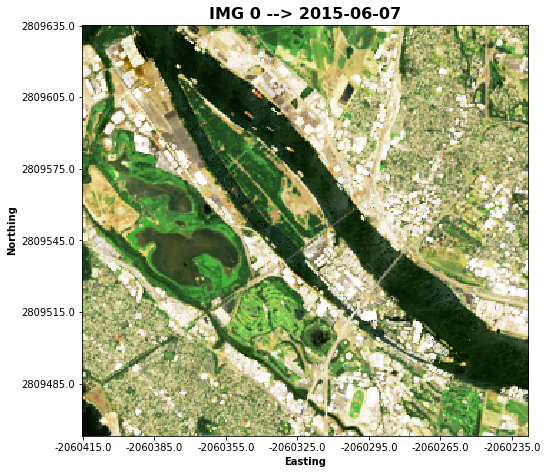

In [18]:
from noteLib import plot_labeled_rgb
ntime = len(landsat_dataset.time)

t=0
cnt=0
plot_labeled_rgb(landsat_dataset, t, cnt)



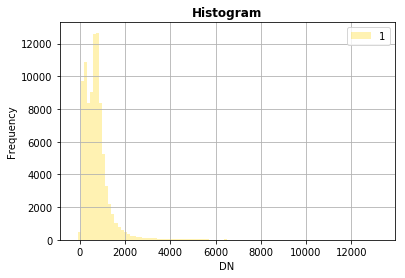

In [19]:
from rasterio.plot import show_hist
show_hist(landsat_dataset['red'][0].values, bins=100, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [20]:
landsat_dataset['red'][0].values.min()

-215

In [21]:
landsat_dataset['red'][0].values.max()

13239

In [22]:
landsat_dataset['red'][0].values.shape

(287, 312)

In [23]:
ary = landsat_dataset['red'][0].values
ary.shape

(287, 312)

In [24]:
ary[0][0]

125

In [25]:
(ny,nx) = ary.shape

In [26]:
total_pixel_count = nx * ny

total_pixel_count


89544

In [27]:
def desat(ary):
    saturated_count = 0

    for y in range (0,286):
        for x in range (0,311):
            #print (x,y)
            if ary[y][x] > 3000:
                # print(x,y)
                #clip
                ary[y][x] = 3000
                saturated_count = saturated_count +1


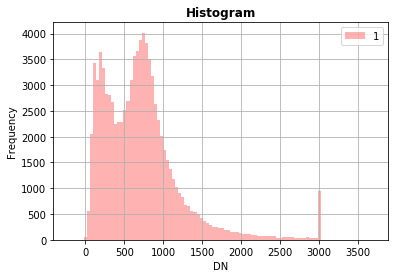

In [28]:
ary = landsat_dataset['red'][0].values
desat(ary)
show_hist(ary, bins=100, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", fc='red')

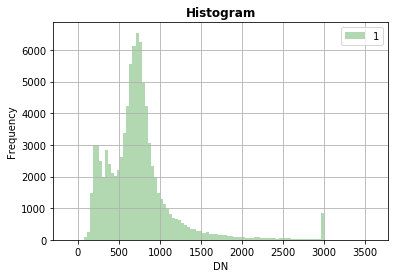

In [29]:
ary = landsat_dataset['green'][0].values
desat(ary)
show_hist(ary, bins=100, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", fc='green')

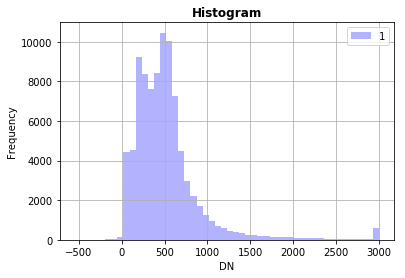

In [31]:
ary = landsat_dataset['blue'][0].values
desat(ary)
show_hist(ary, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", fc='blue')